# Final Project: Supermarket Sales

In [3]:
#Data Retrieving
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#dataset and importing dataset
data=pd.read_csv("C:\\Users\\soyam\\Desktop\\supermarket_sales.csv")

In [5]:
#first look at our data
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
#DataSet Description
#Invoice ID: Computer generated sales slip invoice identification number
#City: Location of supercenters
#Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card
#Gender: Gender type of customer
#Product line: General item categorization groups
#Unit price: Price of each product in USD
#QuantityNumber: of products purchased by customer
#Tax 5%: 5% tax fee for customer buying
#Total: Total price including tax
#Date: Date of purchase
#Time: Purchase time
#Payment: Payment used by customer for purchase
#cogs: Cost of goods sold
#gross margin percentage: Gross margin percentage
#gross income: Gross income
#Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [10]:
#EDA and Data Cleaning
# num of rows x num of columns
print('DataSet Dimensions:',data.shape)
print('----------------------------------------')
print("Columns List: \n")
print(data.columns.tolist())
print('----------------------------------------')
print(data.dtypes)

DataSet Dimensions: (1000, 17)
----------------------------------------
Columns List: 

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
----------------------------------------
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [12]:
#1.Converting 'Date' and 'Time' datatype from object to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Date'].dtype

dtype('<M8[ns]')

In [13]:
# splitting the Date column into 3 columns
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
data['Minute'] = pd.to_datetime(data['Time'], format='%H:%M').dt.minute

In [14]:
#dropping Date and Time Columns
data.drop(['Date', 'Time'], axis=1, inplace=True)


In [15]:
#Checking for null values
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Hour                       0
Minute                     0
dtype: int64

In [16]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Minute
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,14.910000,30.09800
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,3.186857,16.88068
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,10.000000,0.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,12.000000,16.00000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,30.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,18.000000,44.00000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,20.000000,59.00000


In [17]:
#showing the range and median of numerical columns
sales_X = data.describe()
sales_X.loc['range'] = sales_X.loc['max'] - sales_X.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
sales_X = sales_X.loc[out_fields]
sales_X.rename({'50%': 'median'}, inplace=True)
sales_X

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Minute
mean,55.67213,5.51,15.379369,322.966749,307.58738,4.761905,15.379369,6.9727,14.91,30.098
25%,32.87500,3.00,5.924875,124.422375,118.49750,4.761905,5.924875,5.5000,12.00,16.000
median,55.23000,5.00,12.088000,253.848000,241.76000,4.761905,12.088000,7.0000,15.00,30.000
75%,77.93500,8.00,22.445250,471.350250,448.90500,4.761905,22.445250,8.5000,18.00,44.000
range,89.88000,9.00,49.141500,1031.971500,982.83000,0.000000,49.141500,6.0000,10.00,59.000


In [18]:
#List of all categorical data in our data set
categorical_columns = [colname for colname in data.columns if data[colname].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [19]:
for col in categorical_columns:
    print("# unique values in '{0}': {1}".format(col, len(data[col].unique().tolist())))

# unique values in 'Invoice ID': 1000
# unique values in 'Branch': 3
# unique values in 'City': 3
# unique values in 'Customer type': 2
# unique values in 'Gender': 2
# unique values in 'Product line': 6
# unique values in 'Payment': 3


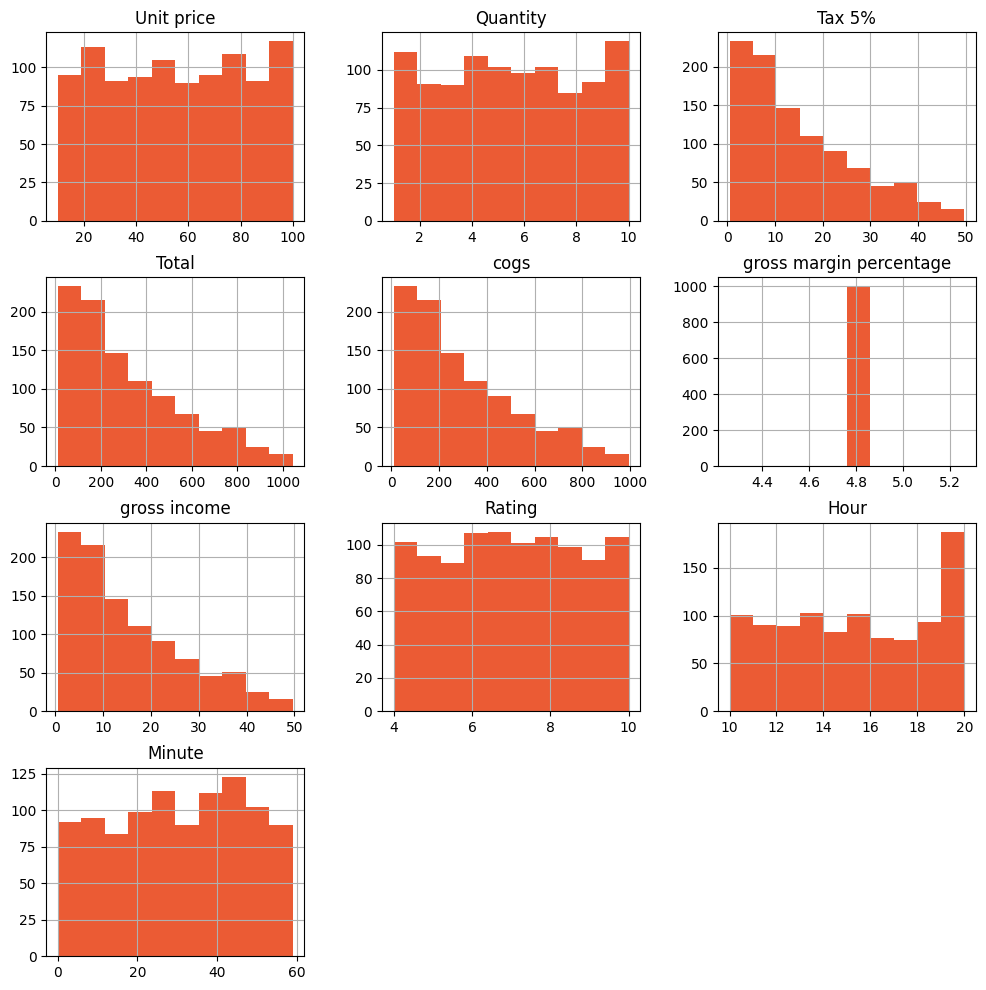

In [25]:
#data visualization
data.hist(figsize=(12,12), color='#eb5b34')
plt.show()

In [34]:
#feature engineering
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,10,37


In [38]:
#one-hot encoding for dummy variables
data.select_dtypes('number')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Minute
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,13,8
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,10,29
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,13,23
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,20,33
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,10,37
...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2,13,46
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,17,16
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7,13,22
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1,15,33


In [39]:
data.select_dtypes('object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,Ewallet
...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,Cash


In [40]:
# dropping Invoice ID since no need for this column
data.drop(['Invoice ID'], axis=1, inplace=True)

In [42]:
categorical_cols = data.dtypes[data.dtypes == np] 
categorical_cols_list = categorical_cols.index.to_list()
categorical_cols_list

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [43]:
data[categorical_cols_list].head().T

,0,1,2,3,4
Branch,A,C,A,A,A
City,Yangon,Naypyitaw,Yangon,Yangon,Yangon
Customer type,Member,Normal,Normal,Member,Normal
Gender,Female,Female,Male,Male,Male
Product line,Health and beauty,Electronic accessories,Home and lifestyle,Health and beauty,Sports and travel
Payment,Ewallet,Cash,Credit card,Ewallet,Ewallet


In [44]:
data = pd.get_dummies(data, columns=categorical_cols_list, drop_first=True)
data.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Minute,...,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,13,8,...,True,False,False,False,False,True,False,False,False,True
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,10,29,...,False,True,False,False,False,False,False,False,False,False
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,13,23,...,True,True,True,False,False,False,True,False,True,False
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,20,33,...,True,False,True,False,False,True,False,False,False,True
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,10,37,...,True,True,True,False,False,False,False,True,False,True


In [48]:
# Log transforming skew variables
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float64
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()
skew_vals

Unit price                 0.007077
Tax 5%                     0.892570
Total                      0.892570
cogs                       0.892570
gross margin percentage    0.000000
gross income               0.892570
Rating                     0.009010
dtype: float64

In [49]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
Tax 5%,0.89257
gross income,0.89257
Total,0.89257
cogs,0.89257


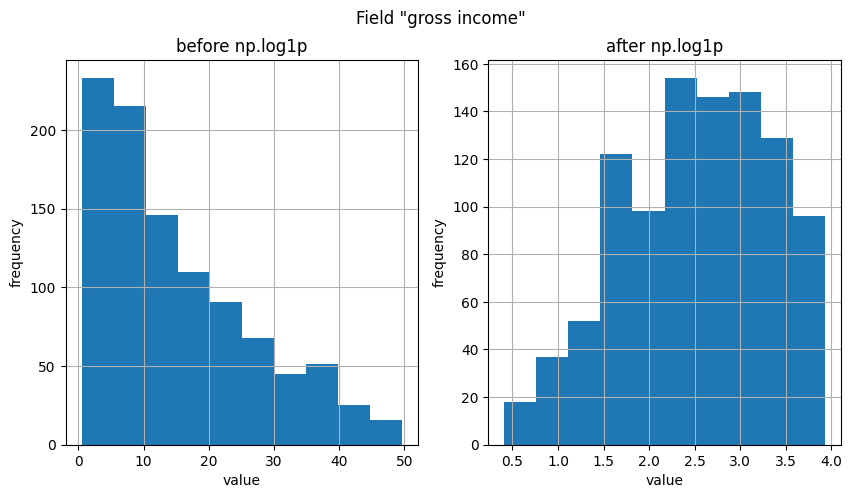

In [50]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "gross income"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
data[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
data[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [52]:
# Perform the skew transformation:
for col in skew_cols.index.values:
    if col == "Total":
        continue
    data[col] = data[col].apply(np.log1p)

In [53]:
#Features Selection
smallest_data =data.loc[:,['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross income', 'Total']]
smallest_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,2.509790,0.803510,0.411116,1.935091,2.571696,3.154667,3.924939
cogs,1000.0,5.383336,0.919131,2.413232,4.783257,5.492073,6.109036,6.901737
gross income,1000.0,2.509790,0.803510,0.411116,1.935091,2.571696,3.154667,3.924939
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000


C:\Users\soyam\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


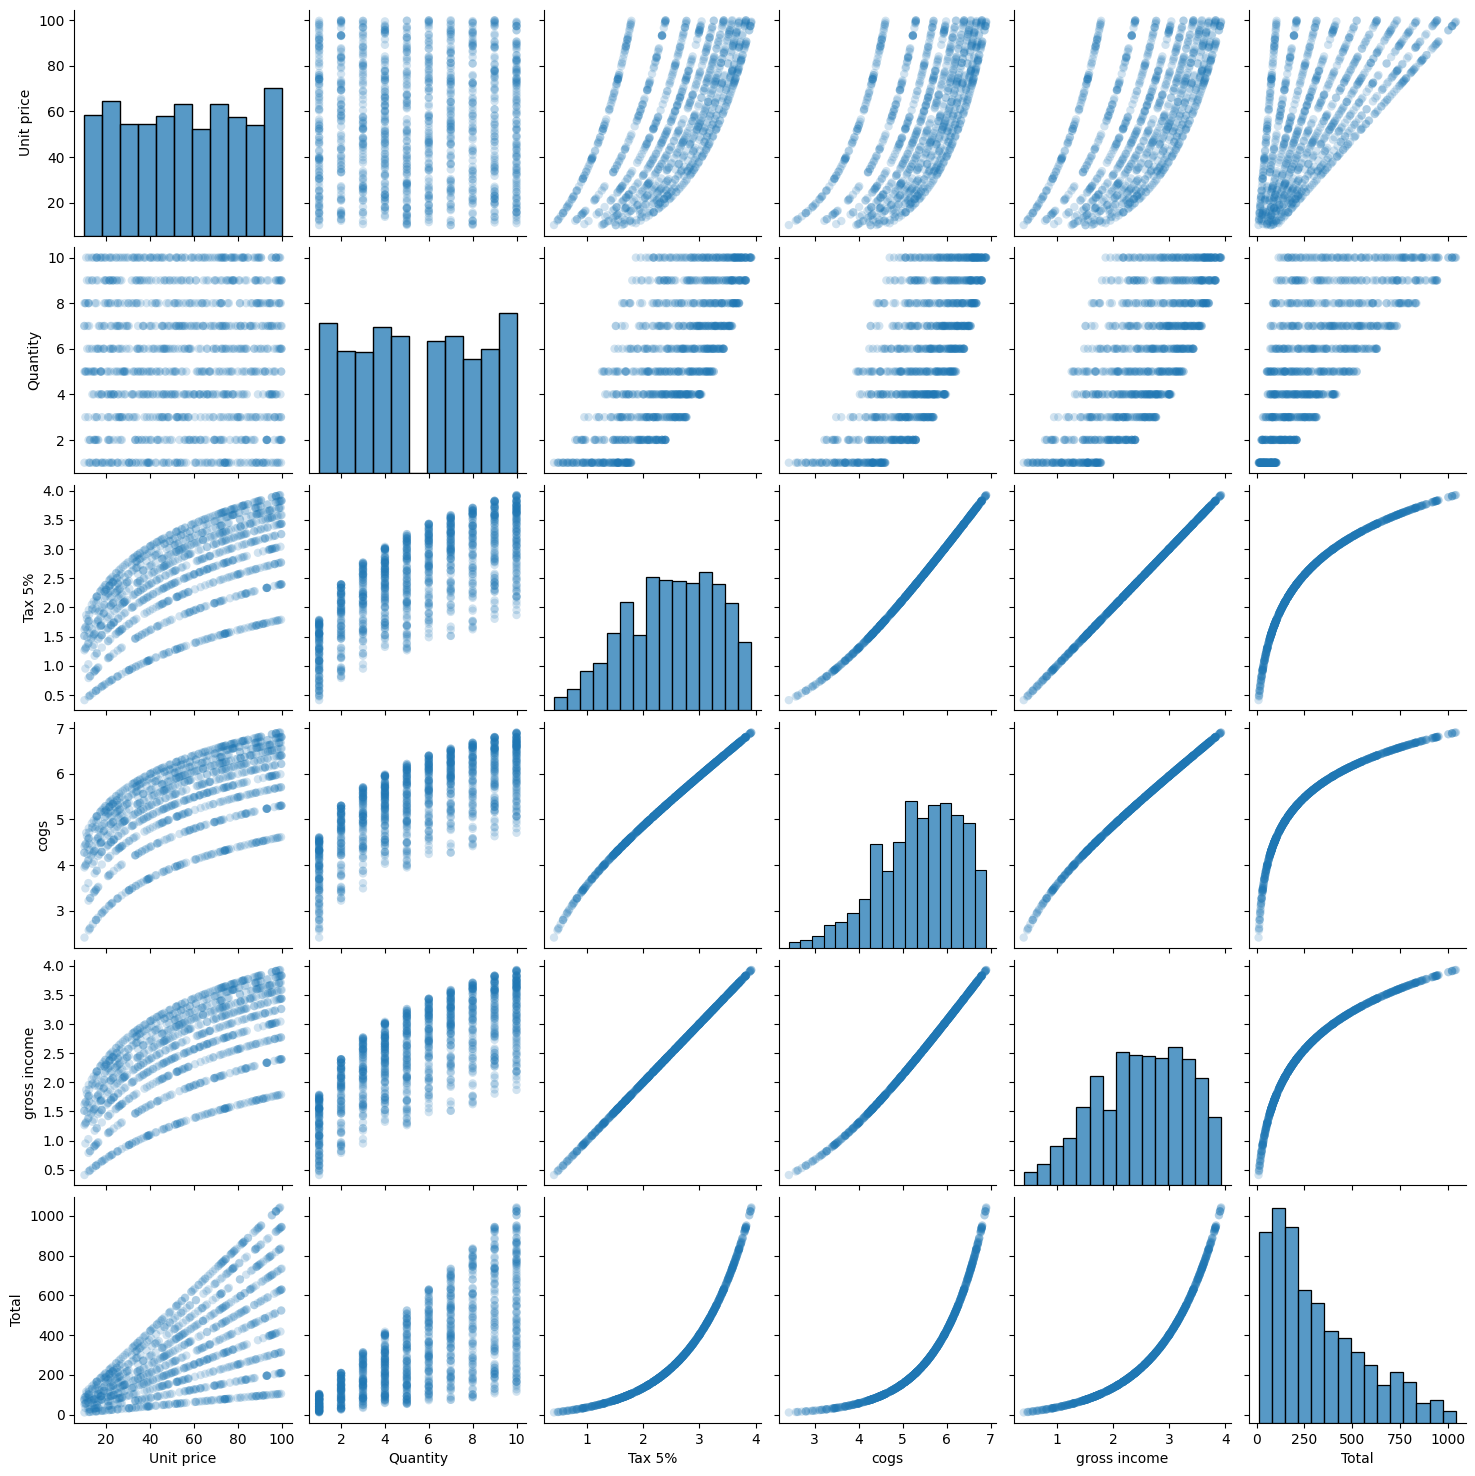

In [54]:
sns.pairplot(smallest_data, plot_kws=dict(alpha=.2, edgecolor='none'))

In [55]:
#Separate our features from our target

# Features
X = smallest_data.iloc[:, :-1]
# Target
y = smallest_data['Total']
X.head()

,Unit price,Quantity,Tax 5%,cogs,gross income
0,74.69,7,3.301064,6.261167,3.301064
1,15.28,5,1.572774,4.348987,1.572774
2,46.33,7,2.845810,5.784779,2.845810
3,58.22,8,3.189982,6.145815,3.189982
4,86.31,7,3.440690,6.405509,3.440690


In [56]:
#Polynomial Features
# Take a copy to prevent data deterioration
X2 = X.copy()

X2['tax5P2'] = X2['Tax 5%'] ** 2
X2['cogs2'] = X2['cogs'] ** 2
X2['gi2'] = X2['gross income'] ** 2

In [57]:
#Feature interactions
# Take a copy to prevent data deterioration
X3 = X2.copy()

# multiplicative interaction
X3['co_x_gi'] = X3['cogs'] * X3['gross income']

# division interaction
X3['Qu_/_UP'] = X3['Quantity'] / X3['Unit price']

In [58]:
# Polynomial Features in Scikit-Learn
from sklearn.preprocessing import PolynomialFeatures
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)
features = ['Unit price', 'Tax 5%', 'gross income']
pf.fit(data[features])

PolynomialFeatures()

In [62]:
#Hypothesis Testing
# Hypothesis 1.0: Null: I could get 150 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(170, 350, 0.5)

print(str(round(prob*100, 1))+"%")

68.5%


In [63]:
# Hypothesis 1.0: Null: I could get 180 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(180, 350, 0.5)

print(str(round(prob*100, 1))+"%")

27.8%


In [64]:
# Hypothesis 1.0: Null: I could get 195 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(195, 350, 0.5)

print(str(round(prob*100, 1))+"%")


1.4%


In [65]:
from scipy.stats import binom
print(binom.ppf(0.95,350,0.5)+1)

191.0


In [ ]:
#Dataset Summary
#Generally, this dataset was so intersing for me to explore and to apply most majority of what I have learned so far 
#through this course but in mainly the quality of the data is not so good we need more inforamtive data about the 
#products in the markets, more locations, more information about customer segemntation the people ages and works, etc.